In [2]:
%matplotlib inline
import miepython
import rayleigh
import matplotlib.pyplot as plt
import numpy as np

# Scattering Phase Functions

<div>
<img src="scattering_regimes.png" width="500"/>
</div>

## Section 1: Heyney-Greenstein Phase Function

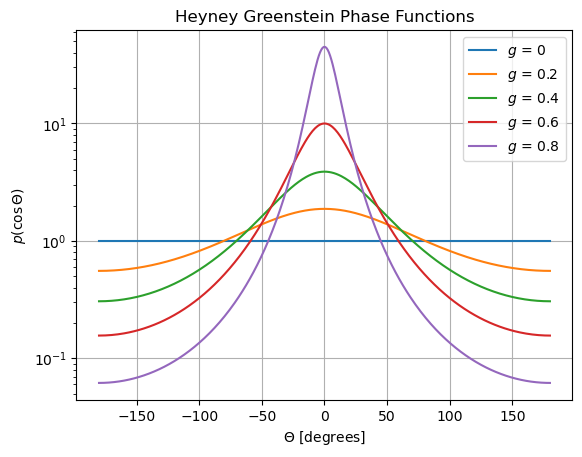

In [25]:
angles = np.linspace(-180,180,360) # variety of angles
mu = np.cos(np.radians(angles)) # cos(theta)

def heyney_greenstein(g, mu):
    num = (1. - np.power(g, 2))
    den = np.power((1. + np.power(g, 2) - 2. * g * mu), 3./2.)
    return num/den

for g in [0,0.2,0.4,0.6,0.8]:
    p_hg = heyney_greenstein(g=g, mu=mu)
    plt.plot(angles, p_hg, label=f'$g$ = {g}')
plt.legend()
plt.yscale('log')
plt.grid()
plt.ylabel(r"$p(\cos \Theta)$")
plt.xlabel(r"$\Theta$ [degrees]")
plt.title("Heyney Greenstein Phase Functions")
plt.show()

## Section 2: Comparing the H-G Phase Function with the Mie-Calculated Phase Function

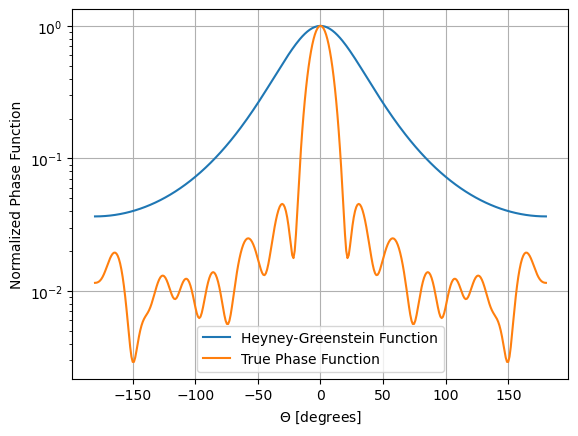

In [42]:
# Use the two input variables for Mie theory to calculate the phase functions
x = 8 # Size Parameter
m = 2.3-0.01j # index of refraction

angles = np.linspace(-180,180,360) # variety of angles
mu = np.cos(np.radians(angles)) # cos(theta)

# Use the Mie code to calculate the asymmetry parameter for this given IOR and size parameter
qe, qs, qb, g = miepython.mie(m, x) # Gets the asymmetry parameter (g) from Mie code
qext = miepython.i_unpolarized(m, x, mu) # Calculates the extinction for a set number of angles (scattering phase function)

# Calculate the H-G scattering phase function from the Mie code's asymmetry parameter
p_hg = heyney_greenstein(g=g, mu=mu)

plt.plot(angles, p_hg/np.max(p_hg), label='Heyney-Greenstein Function')
plt.plot(angles, qext/np.max(qext), label='True Phase Function')
plt.legend()
plt.yscale('log')
plt.grid()
plt.ylabel("Normalized Phase Function")
plt.xlabel("$\Theta$ [degrees]")
plt.show()